In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

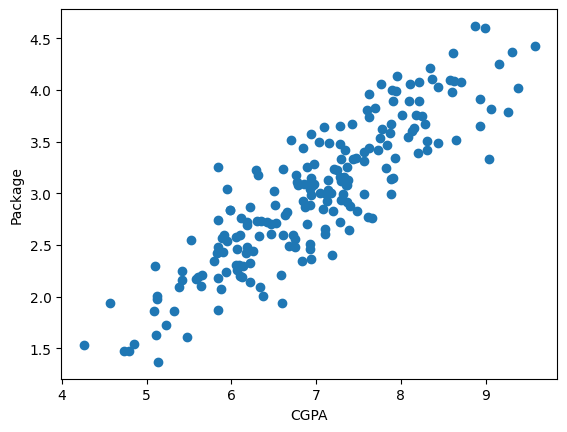

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [ ]:
x = df.iloc[:,0:1].values
y = df.iloc[:,-1].values

In [ ]:
x,y

(array([[6.89],
        [5.12],
        [7.82],
        [7.42],
        [6.94],
        [7.89],
        [6.73],
        [6.75],
        [6.09],
        [8.31],
        [5.32],
        [6.61],
        [8.94],
        [6.93],
        [7.73],
        [7.25],
        [6.84],
        [5.38],
        [6.94],
        [7.48],
        [7.28],
        [6.85],
        [6.14],
        [6.19],
        [6.53],
        [7.28],
        [8.31],
        [5.42],
        [5.94],
        [7.15],
        [7.36],
        [8.1 ],
        [6.96],
        [6.35],
        [7.34],
        [6.87],
        [5.99],
        [5.9 ],
        [8.62],
        [7.43],
        [9.38],
        [6.89],
        [5.95],
        [7.66],
        [5.09],
        [7.87],
        [6.07],
        [5.84],
        [8.63],
        [8.87],
        [9.58],
        [9.26],
        [8.37],
        [6.47],
        [6.86],
        [8.2 ],
        [5.84],
        [6.6 ],
        [6.92],
        [7.56],
        [5.61],
        [5.48],
        

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

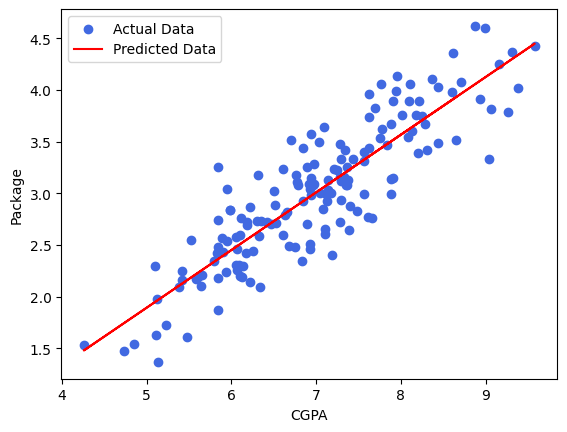

In [ ]:
plt.scatter(x_train,y_train,color='royalblue',label='Actual Data')
plt.plot(x_train,lr.predict(x_train),color='red',label='Predicted Data')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [ ]:
print("MAE:",mean_absolute_error(y_test,y_pred)) # LPA
print("MSE:",mean_squared_error(y_test,y_pred)) # (LPA)^2

MAE: 0.2884710931878175
MSE: 0.12129235313495527


In [ ]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) # LPA

RMSE: 0.34827051717731616


In [ ]:
print("R2:",r2_score(y_test,y_pred)) # Dimensionless

R2: 0.780730147510384


In [ ]:
r2 = r2_score(y_test,y_pred)

In [ ]:
# Adjusted R2 Score:
x_test.shape[0]

40

In [ ]:
num = (1-r2)*(x_test.shape[0] - 1)
den = (x_test.shape[0] - 1 - x_test.shape[1])
adjr2 = 1 - num/den

In [ ]:
adjr2
# so R2 is 0.78 and after adjusting, its 0.77, very close

0.7749598882343415

Now i will add a random value column to see how it effects my R2 score

In [ ]:
new_df1 = df.copy()
new_df1['random'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random','package']]
new_df1.head()

,cgpa,random,package
0,6.89,0.849459,3.26
1,5.12,0.326408,1.98
2,7.82,0.635327,3.25
3,7.42,0.861321,3.67
4,6.94,0.466379,3.57


Text(0, 0.5, 'Package(in lpa)')

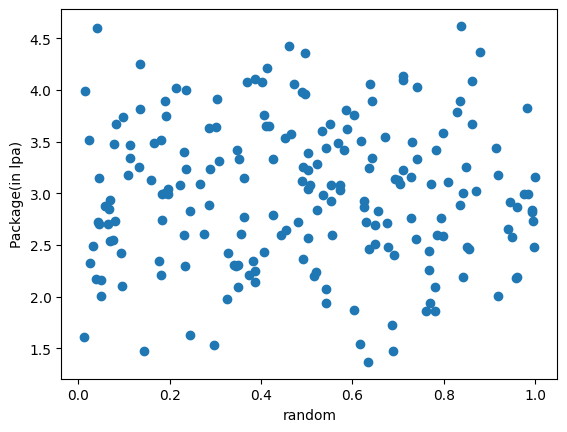

In [ ]:
plt.scatter(new_df1['random'],new_df1['package'])
plt.xlabel('random')
plt.ylabel('Package(in lpa)')
# its completely random

ill now extract x and y and predict

In [ ]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7815860236511328


So after adding a random column, My r2 score is still .78

In [ ]:
num = (1-r2)*(x_test.shape[0] - 1)
den = (x_test.shape[0] - 1 - x_test.shape[1])
adjr2 = 1 - num/den
adjr2

0.7758382874314258

Adjusted r2 is also almost the same :)
now i will add a column which is actually dependant to see the effect on r2

In [ ]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2

,cgpa,iq,package
0,6.89,3.46,3.26
1,5.12,0.88,1.98
2,7.82,3.65,3.25
3,7.42,4.47,3.67
4,6.94,4.57,3.57
...,...,...,...
195,6.93,2.56,2.46
196,5.89,3.47,2.57
197,7.21,3.14,3.24
198,7.63,3.36,3.96


In [ ]:
new_df2.sample(5)

,cgpa,iq,package
115,8.35,3.91,4.21
87,8.09,3.65,3.55
49,8.87,5.32,4.62
191,7.28,4.28,3.48
146,6.07,2.06,2.46


Text(0, 0.5, 'Package(in lpa)')

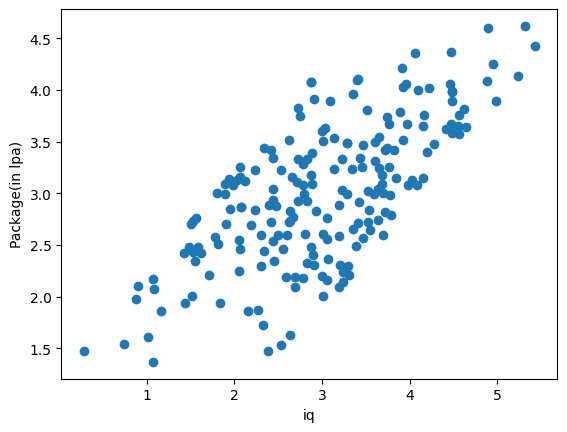

In [ ]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [ ]:
np.random.randint(-100,100)

5

In [ ]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X,y

(     cgpa    iq
 0    6.89  3.46
 1    5.12  0.88
 2    7.82  3.65
 3    7.42  4.47
 4    6.94  4.57
 ..    ...   ...
 195  6.93  2.56
 196  5.89  3.47
 197  7.21  3.14
 198  7.63  3.36
 199  6.22  2.83
 
 [200 rows x 2 columns],
 0      3.26
 1      1.98
 2      3.25
 3      3.67
 4      3.57
        ... 
 195    2.46
 196    2.57
 197    3.24
 198    3.96
 199    2.33
 Name: package, Length: 200, dtype: float64)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7997532059712347


In [ ]:
num = (1-r2)*(x_test.shape[0] - 1)
den = (x_test.shape[0] - 1 - x_test.shape[1])
adjr2 = 1 - num/den
adjr2

0.7944835534967934

So the column iq actually changed the r2 score from .78 to .799